In [1]:
%pip install opencv-python numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

Note: using train dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
test dataset using https://arxiv.org/abs/2307.02848

In [3]:
import os
import sys

module_path = os.path.abspath(".")

# if module_path not in sys.path:
sys.path.append(module_path)

import dataset
import segmentation
from dataset import *
from segmentation import *

In [4]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()
# x_tb=x_tb[x_tb != None]

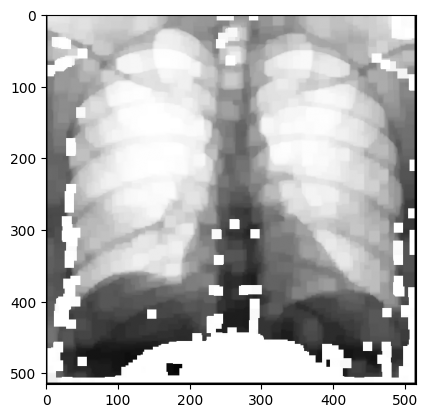

In [5]:
pyplot.imshow(x_normal[0],cmap='gray')

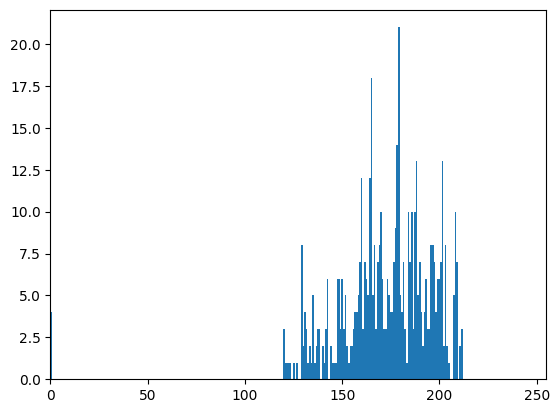

In [6]:
vals = x_normal[0].mean(axis=0).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

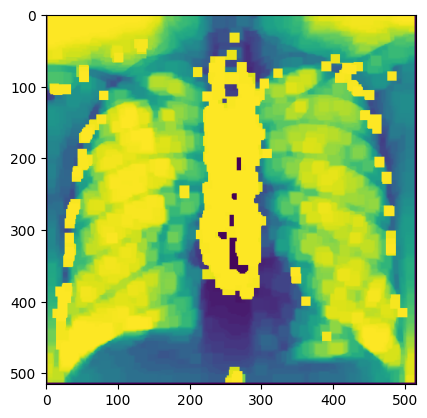

In [7]:
pyplot.imshow(x_tb[0])

In [8]:
image = get_segmentation(x_tb_test[0])

In [9]:
ret3,th3 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [10]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8)

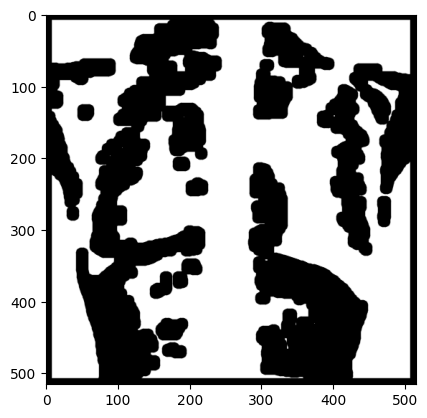

In [11]:
pyplot.imshow(get_segmentation(x_tb_test[9]),cmap="gray")

In [12]:
get_segmentation(x_tb_test[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8)

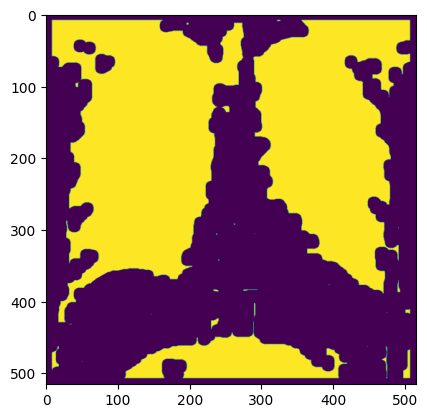

In [13]:
pyplot.imshow(get_segmentation(x_normal[0]))

In [14]:
np.array(x_tb).shape

(3294, 516, 516)

In [15]:
x=[get_segmentation(x) for x in x_normal[:]]
y=["normal"]*len(x_normal[:])
x=x+[get_segmentation(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_segmentation(x_test) for x_test in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_segmentation(x_test) for x_test in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
dict_test = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [16]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en

In [18]:
dict["x"].shape

(7608, 516, 516)

In [19]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2])
X_reshaped_test = dict_test["x"].reshape(dict_test["x"].shape[0], dict_test["x"].shape[1]*dict_test["x"].shape[2])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42, 
                                   test_size=0.1, 
                                   shuffle=True)

# _____, X_test, ___, y_test = train_test_split(X_reshaped_test, dict_test["y"] ,
#                                    random_state=42, 
#                                    test_size=0.9999, 
#                                    shuffle=True)

In [21]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [22]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [24]:
# # Creating a support vector classifier
# clfsvc = make_pipeline(
#     RobustScaler(),
#     LinearSVC(random_state=42, tol=1e-5, class_weight="balanced",max_iter=500, C=1),
#     # RandomForestClassifier(random_state=42,max_depth=50)
# )
model = xgb.XGBClassifier(early_stopping_rounds=5, eval_metric='logloss')

In [25]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)>

In [26]:
# clf.fit(X_train, y_train)

In [27]:
le = LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_val = le.fit_transform(y_val)

In [28]:
new_y_train

array([0, 1, 0, ..., 0, 1, 1], shape=(6847,))

In [29]:
new_y_val

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [30]:
new_y_val.shape

(761,)

In [31]:
X_val.shape

(761, 266256)

In [32]:
model.fit(X_train, new_y_train, eval_set=[(X_val, new_y_val)])

[0]	validation_0-logloss:0.52046
[1]	validation_0-logloss:0.42748
[2]	validation_0-logloss:0.36825
[3]	validation_0-logloss:0.32449
[4]	validation_0-logloss:0.29072
[5]	validation_0-logloss:0.26771
[6]	validation_0-logloss:0.25112
[7]	validation_0-logloss:0.23328
[8]	validation_0-logloss:0.21830
[9]	validation_0-logloss:0.21263
[10]	validation_0-logloss:0.20422
[11]	validation_0-logloss:0.19843
[12]	validation_0-logloss:0.19177
[13]	validation_0-logloss:0.18686
[14]	validation_0-logloss:0.18172
[15]	validation_0-logloss:0.17725
[16]	validation_0-logloss:0.17121
[17]	validation_0-logloss:0.16938
[18]	validation_0-logloss:0.16565
[19]	validation_0-logloss:0.16225
[20]	validation_0-logloss:0.16212
[21]	validation_0-logloss:0.15913
[22]	validation_0-logloss:0.15863
[23]	validation_0-logloss:0.15761
[24]	validation_0-logloss:0.15806
[25]	validation_0-logloss:0.15765
[26]	validation_0-logloss:0.15674
[27]	validation_0-logloss:0.15555
[28]	validation_0-logloss:0.15706
[29]	validation_0-loglos

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,5
,enable_categorical,False
,eval_metric,'logloss'


In [33]:
# result = clf.predict(X_reshaped_test)

In [34]:
result_svc = model.predict(X_reshaped_test)

In [35]:
result_svc

array([0, 0, 0, ..., 1, 1, 1], shape=(4200,))

In [36]:
le.classes_

array(['normal', 'tb'], dtype='<U6')

In [37]:
new_y_test = le.fit_transform(dict_test['y'].astype(str))

In [38]:
# accuracy_score(dict_test['y'], result_svc)
accuracy_score(new_y_test, result_svc)

0.8519047619047619

In [39]:
from sklearn.metrics import classification_report

In [40]:
# print(classification_report(dict_test['y'], result_svc))
print(classification_report(new_y_test, result_svc))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3500
           1       0.54      0.80      0.64       700

    accuracy                           0.85      4200
   macro avg       0.75      0.83      0.77      4200
weighted avg       0.89      0.85      0.86      4200



In [ ]:
get

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(516, 516), dtype=uint8),
 array([[0, 0, 0, ..., 0

In [45]:
model.predict([x_tb_test[10].reshape(x_tb_test[10].shape[0]*x_tb_test[10].shape[1])])

array([1])